# SVM on Polish Companies Bankruptcy dataset
[Dataset link](https://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data)


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix
from sklearn.utils import resample
from itertools import combinations

## Loading and exploring the data

In [2]:
data = arff.loadarff('data/1year.arff')
df = pd.DataFrame(data[0])

data = arff.loadarff('data/2year.arff')
df1 = pd.DataFrame(data[0])
df = pd.concat([df, df1])

data = arff.loadarff('data/3year.arff')
df1 = pd.DataFrame(data[0])
df = pd.concat([df, df1])

data = arff.loadarff('data/4year.arff')
df1 = pd.DataFrame(data[0])
df = pd.concat([df, df1])

data = arff.loadarff('data/5year.arff')
df1 = pd.DataFrame(data[0])
df = pd.concat([df, df1])

df

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.396410,2.04720,32.3510,0.38825,0.249760,1.33050,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,b'0'
1,0.209120,0.49988,0.472250,1.94470,14.7860,0.00000,0.258340,0.99601,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,b'0'
2,0.248660,0.69592,0.267130,1.55480,-1.1523,0.00000,0.309060,0.43695,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,b'0'
3,0.081483,0.30734,0.458790,2.49280,51.9520,0.14988,0.092704,1.86610,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,b'0'
4,0.187320,0.61323,0.229600,1.40630,-7.3128,0.18732,0.187320,0.63070,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,0.012898,0.70621,0.038857,1.17220,-18.9070,0.00000,0.013981,0.41600,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,b'1'
5906,-0.578050,0.96702,-0.800850,0.16576,-67.3650,-0.57805,-0.578050,-0.40334,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,b'1'
5907,-0.179050,1.25530,-0.275990,0.74554,-120.4400,-0.17905,-0.154930,-0.26018,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,b'1'
5908,-0.108860,0.74394,0.015449,1.08780,-17.0030,-0.10886,-0.109180,0.12531,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,b'1'


All attributes are of type `float64` as can be seen below.

In [3]:
list(df.dtypes)

[dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('floa

## Preparing the data

Changing the `class` type to int. 

In [4]:
df['class'] = df['class'].astype('int')

In [5]:
df['class'].unique()

array([0, 1])

The dataset is highly imbalanced, as can be seen below. Class 0 has **41314** samples while class 1 has only **2091**.

In [6]:
df['class'].value_counts()

0    41314
1     2091
Name: class, dtype: int64

Verifying missing data, below, there're attributes missing many values, noticeably **Attr37**.

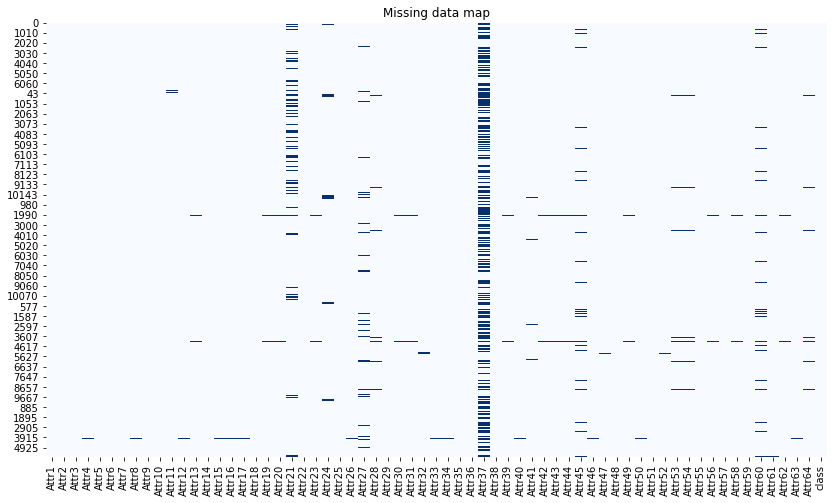

In [7]:
plt.figure(figsize=(14,8))
sns.heatmap(df.isna(), cbar=False, cmap="Blues").set_title("Missing data map")
plt.show()

As the dataset is highly imbalanced it'd be interesting to identify from the class with less samples which attributes have more missing values and how much that would be.
<br>
<br>
Percentage of missing values per column for class 1:

In [8]:
nan_perc = df.loc[df['class']==1].isna().sum()/len(df.index)*100
nan_perc.sort_values(ascending=False).head(10)

Attr37    2.250893
Attr27    1.647276
Attr21    1.416887
Attr60    0.405483
Attr45    0.405483
Attr64    0.184311
Attr53    0.184311
Attr54    0.184311
Attr28    0.184311
Attr11    0.085244
dtype: float64

The strategy selected is to drop the attributes related to more missing data for the class 1. That being in a way that the number of samples in class 1 is maximized.
<br>
For that, the 10 columns with more missing values, for class 1, were selected. 

In [9]:
list_attr = list(nan_perc.sort_values(ascending=False).head(10).index)
list_attr

['Attr37',
 'Attr27',
 'Attr21',
 'Attr60',
 'Attr45',
 'Attr64',
 'Attr53',
 'Attr54',
 'Attr28',
 'Attr11']

In [10]:
max_val_list = 0
max_comb = 0

for i in range(1, len(list_attr)+1):
    comb = combinations(list_attr, i)
    for j in list(comb):
        df_p = df.copy()
        #print(list(j))
        df_p.drop(columns=list(j), inplace=True)
        
        df_p.dropna(inplace=True)
        res = df_p['class'].value_counts()[1]
        #print(res)
        if res > max_val_list:
            max_val_list = res
            max_comb = list(j)
            
            
print("Class 1 maximum number of samples:", max_val_list)
print("Combination of Attributes to achieve the maximum number:", max_comb)

Class 1 maximum number of samples: 2058
Combination of Attributes to achieve the maximum number: ['Attr37', 'Attr27', 'Attr21', 'Attr60', 'Attr45', 'Attr64', 'Attr53', 'Attr54', 'Attr28', 'Attr11']


A combination of the 10 attributes to be dropped in order to maximize the number of samples for class 1 was found, above, using [combinations](http://www.nabla.hr/CP-PermutCombinatoA.htm#Combinations) 
<br>
<br>
The next steps are to drop these attributes and then drop the missing values of the remaining attributes in the dataframe.

In [11]:
df.drop(columns=max_comb, inplace=True)

In [12]:
df.dropna(inplace=True)

## SVM (Support Vector Machine)

The algorithm chosen to classify the data was SVM, in order to do so the dataset will be downsampled, leaving each category with **1000** samples, and balanced as SVMs works well with small datasets but not necessarily with large ones.

In [13]:
df_class_1 = df.loc[df['class']==1]
df_class_0 = df.loc[df['class']==0]

In [14]:
df_class_0_downsampled = resample(df_class_0,
                                 replace=False,
                                 n_samples=2000)


df_class_1_downsampled = resample(df_class_1,
                                 replace=False,
                                 n_samples=2000)

Concatenating the downsampled dataframes.

In [15]:
df = pd.concat([df_class_1_downsampled, df_class_0_downsampled])

Separating the dataset into training and test.

In [16]:
X = df.drop('class', axis=1)
y = df['class']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Scaling the attributes to get better results from training.

In [18]:
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [19]:
clf = svm.SVC()
clf.fit(X_train_scaled, y_train)

SVC()

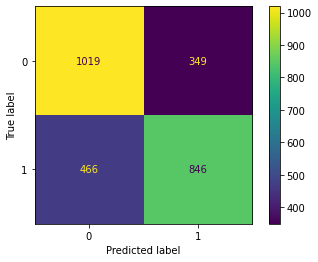

In [20]:
plot_confusion_matrix(clf,
                      X_train_scaled,
                      y_train)

In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef

pred = clf.predict(X_test_scaled)
print(classification_report(y_test, pred))
print("MCC:", matthews_corrcoef(y_test, pred))

              precision    recall  f1-score   support

           0       0.65      0.77      0.71       632
           1       0.75      0.62      0.68       688

    accuracy                           0.69      1320
   macro avg       0.70      0.69      0.69      1320
weighted avg       0.70      0.69      0.69      1320

MCC: 0.3919074486256275


In [22]:
clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [23]:
# objective function to be used by optuna study
def objective(trial):
    
    x_kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    x_C = trial.suggest_float('C', 0.5, 100)
    x_gamma = trial.suggest_categorical('gamma', [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1])
    
    classifier_obj = svm.SVC(C=x_C, kernel=x_kernel, gamma=x_gamma)
    
    classifier_obj.fit(X_train_scaled, y_train)
    
    pred_clf = classifier_obj.predict(X_test_scaled)

    #score = f1_score(y_test, pred_clf)
    score = matthews_corrcoef(y_test, pred)
    return score

In [24]:
import optuna

In [25]:
study = optuna.create_study(direction="maximize") # maximize the Matthews Correlation Coefficient
study.optimize(objective, n_trials=500)
print(study.best_trial)

[I 2021-10-09 08:18:45,123] A new study created in memory with name: no-name-3c5e3380-eea3-4ed5-8861-82f8cafd0e74
[I 2021-10-09 08:18:45,587] Trial 0 finished with value: 0.3919074486256275 and parameters: {'kernel': 'sigmoid', 'C': 86.17088247000079, 'gamma': 1}. Best is trial 0 with value: 0.3919074486256275.
[I 2021-10-09 08:18:46,963] Trial 1 finished with value: 0.3919074486256275 and parameters: {'kernel': 'poly', 'C': 72.11593508226863, 'gamma': 0.1}. Best is trial 0 with value: 0.3919074486256275.
[I 2021-10-09 08:18:47,511] Trial 2 finished with value: 0.3919074486256275 and parameters: {'kernel': 'rbf', 'C': 62.16807185269297, 'gamma': 0.0001}. Best is trial 0 with value: 0.3919074486256275.
[I 2021-10-09 08:18:48,019] Trial 3 finished with value: 0.3919074486256275 and parameters: {'kernel': 'rbf', 'C': 25.260257455533964, 'gamma': 0.001}. Best is trial 0 with value: 0.3919074486256275.
[I 2021-10-09 08:18:48,536] Trial 4 finished with value: 0.3919074486256275 and parameter

[I 2021-10-09 08:22:21,375] Trial 38 finished with value: 0.3919074486256275 and parameters: {'kernel': 'rbf', 'C': 56.32545489891919, 'gamma': 0.005}. Best is trial 0 with value: 0.3919074486256275.
[I 2021-10-09 08:22:26,754] Trial 39 finished with value: 0.3919074486256275 and parameters: {'kernel': 'linear', 'C': 87.13971413287075, 'gamma': 0.05}. Best is trial 0 with value: 0.3919074486256275.
[I 2021-10-09 08:22:27,581] Trial 40 finished with value: 0.3919074486256275 and parameters: {'kernel': 'rbf', 'C': 78.77007099721979, 'gamma': 1}. Best is trial 0 with value: 0.3919074486256275.
[I 2021-10-09 08:22:30,896] Trial 41 finished with value: 0.3919074486256275 and parameters: {'kernel': 'linear', 'C': 57.249732386907795, 'gamma': 0.25}. Best is trial 0 with value: 0.3919074486256275.
[I 2021-10-09 08:22:33,638] Trial 42 finished with value: 0.3919074486256275 and parameters: {'kernel': 'linear', 'C': 38.724259820080135, 'gamma': 0.5}. Best is trial 0 with value: 0.391907448625627

[I 2021-10-09 08:23:11,941] Trial 77 finished with value: 0.3919074486256275 and parameters: {'kernel': 'poly', 'C': 34.08205649882064, 'gamma': 0.0001}. Best is trial 0 with value: 0.3919074486256275.
[I 2021-10-09 08:23:12,701] Trial 78 finished with value: 0.3919074486256275 and parameters: {'kernel': 'sigmoid', 'C': 1.6755626315564989, 'gamma': 0.0001}. Best is trial 0 with value: 0.3919074486256275.
[I 2021-10-09 08:23:13,194] Trial 79 finished with value: 0.3919074486256275 and parameters: {'kernel': 'rbf', 'C': 12.035461402880177, 'gamma': 0.1}. Best is trial 0 with value: 0.3919074486256275.
[I 2021-10-09 08:23:13,686] Trial 80 finished with value: 0.3919074486256275 and parameters: {'kernel': 'rbf', 'C': 17.444603163494087, 'gamma': 0.1}. Best is trial 0 with value: 0.3919074486256275.
[I 2021-10-09 08:23:14,175] Trial 81 finished with value: 0.3919074486256275 and parameters: {'kernel': 'rbf', 'C': 14.94951155642175, 'gamma': 0.1}. Best is trial 0 with value: 0.39190744862562

KeyboardInterrupt: 

---
---

In [ ]:
%load_ext watermark
%watermark -iv -v -nuw